<a href="https://colab.research.google.com/github/noufabdullahal/T5/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
print(df.head())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                3.0                   1                   1.0   
1             1                3.0                   2                   1.0   
2            62                3.0                   2                   1.0   
3             4                3.0                   1                   2.0   
4            21                3.0                   2                   2.0   

         Date  Day_of_Week  ...  2nd_Road_Class 2nd_Road_Number  \
0  27/1

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [6]:

print(df.isnull().sum())

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [7]:
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(),inplace=True)

In [8]:
df.dropna(axis=1, inplace=True)
print(df)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Number_of_Vehicles  Number_of_Casualties  

In [9]:
print(df.isnull().sum())

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Weather_Conditions                             0
Road_Surface_Conditi

In [10]:
df.duplicated().sum()

47

In [11]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [12]:
print(df.columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Weather_Conditions',
       'Road_Surface_Conditions',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')


In [13]:
missing_values = df.isna().sum()
print(df)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Number_of_Vehicles  Number_of_Casualties  

<Axes: xlabel='Number_of_Vehicles'>

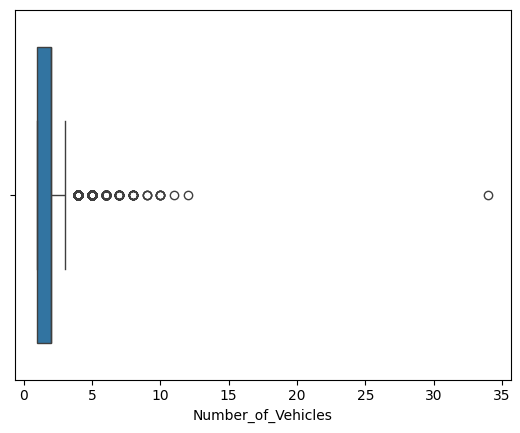

In [16]:
sns.boxplot(x=df['Number_of_Vehicles'])

<Axes: xlabel='Number_of_Casualties'>

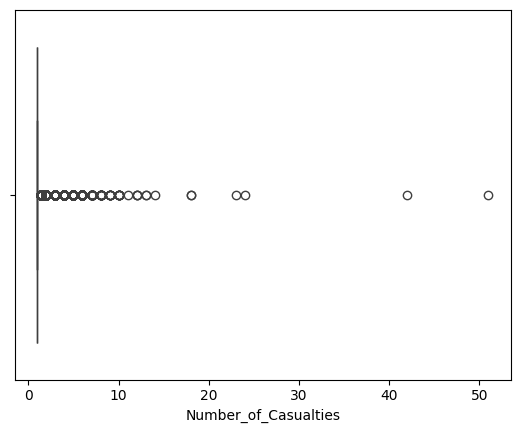

In [17]:
sns.boxplot(x=df['Number_of_Casualties'])

<Axes: xlabel='Location_Easting_OSGR'>

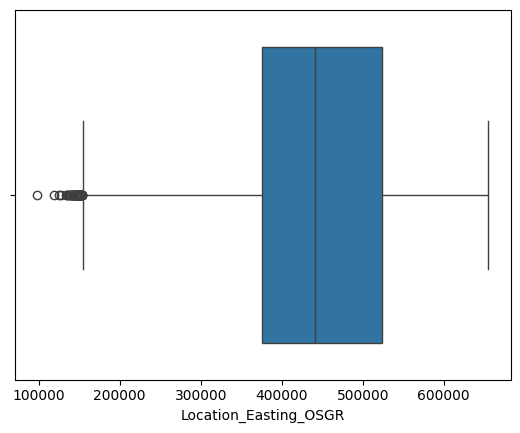

In [18]:
sns.boxplot(x=df['Location_Easting_OSGR'])

<Axes: xlabel='Location_Northing_OSGR'>

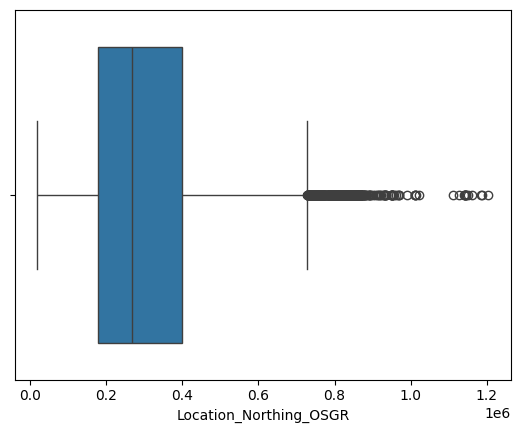

In [19]:

sns.boxplot(x=df['Location_Northing_OSGR'])

In [20]:
    Q1 = df['Location_Northing_OSGR'].quantile(0.25)
    Q3 = df['Location_Northing_OSGR'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['Location_Northing_OSGR'] < (Q1 - 1.5 * IQR)) | (df['Location_Northing_OSGR'] > (Q3 + 1.5 * IQR)))]

In [23]:
    Q1 = df['Location_Easting_OSGR'].quantile(0.25)
    Q3 = df['Location_Easting_OSGR'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['Location_Easting_OSGR'] < (Q1 - 1.5 * IQR)) | (df['Location_Easting_OSGR'] > (Q3 + 1.5 * IQR)))]

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

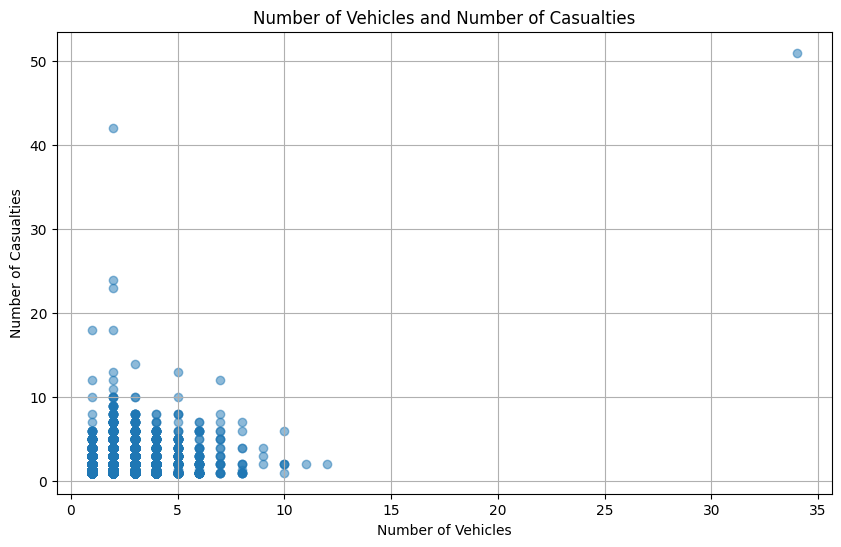

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Vehicles'], df['Number_of_Casualties'], alpha=0.5)
plt.title('Number of Vehicles and Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [36]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Year
count,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000,51146.000000
mean,442213.773824,292463.111133,-1.397408,52.520241,29.489207,1.837348,1.355250,4.130079,341.086791,4.081473,997.180425,39.033649,2.686153,386.336253,2009.401263
std,94129.796754,149582.471675,1.381007,1.347420,24.599704,0.727515,0.848042,1.925078,251.918079,1.430308,1797.535354,14.168009,3.202166,1304.243182,3.008418
min,160000.000000,19030.000000,-5.711104,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,2005.000000
25%,378650.000000,177750.000000,-2.320234,51.484747,6.000000,1.000000,1.000000,2.000000,110.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,2006.000000
50%,442945.000000,262500.000000,-1.364245,52.247014,30.000000,2.000000,1.000000,4.000000,320.000000,4.000000,130.000000,30.000000,3.000000,0.000000,2010.000000
75%,524177.500000,394950.000000,-0.206373,53.448828,45.000000,2.000000,1.000000,6.000000,514.000000,6.000000,702.000000,50.000000,6.000000,0.000000,2012.000000
max,654960.000000,728175.000000,1.753632,56.436717,98.000000,34.000000,51.000000,7.000000,940.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,2014.000000


In [42]:

X = df[['Number_of_Vehicles']]
y = df['Location_Easting_OSGR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?